#**DETECCIÓN 🔎 DE FRAUDE EN TARJETAS DE CRÉDITO 💳**

### Este proyecto es desarrollado siguiendo paso a paso la metodologia CRISP-DM.

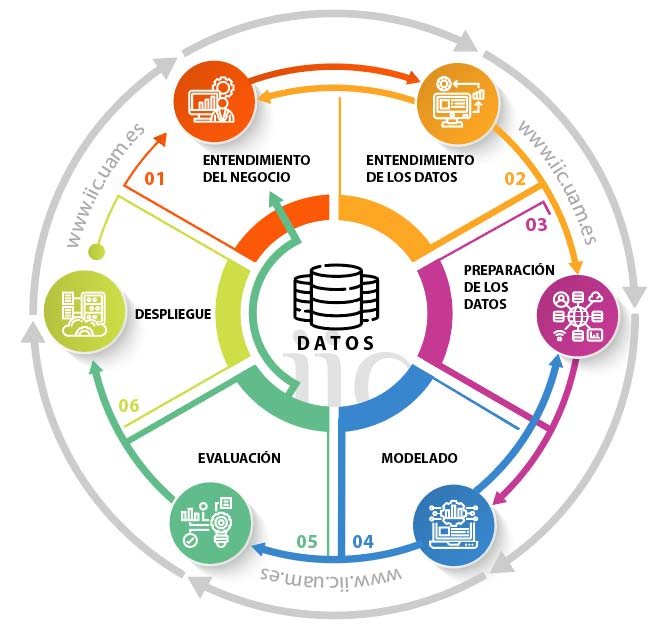







#<font color=#D35400>**✅ 1. Entendimiento del negocio**</font>

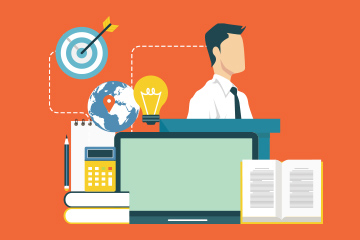



###**📋Introducción**

Las compañias de tarjetas de crédito se refiere a la empresa o la entidad que opera y administra el sistema de tarjetas de crédito, que puede incluir la emisión de tarjetas, el procesamiento de transacciones y la gestión de la red de comerciantes.

Es crucial que una compañía de tarjetas de crédito tenga conocimiento de qué transacciones pueden ser fraudulentas debido a diversas razones:

1. **Protección del cliente:** El principal objetivo de identificar transacciones fraudulentas es proteger a los titulares de tarjetas de crédito de cualquier actividad fraudulenta que pueda resultar en pérdidas financieras o robo de identidad.

2. **Protección de la reputación de la empresa:** La detección y prevención eficaz de transacciones fraudulentas ayudan a mantener la confianza de los clientes en la compañía de tarjetas de crédito. La reputación de la empresa puede verse perjudicada si no se toman medidas para evitar el fraude.

3. **Cumplimiento normativo:** Las compañías de tarjetas de crédito están sujetas a regulaciones estrictas que exigen medidas de seguridad y prevención de fraudes. El incumplimiento de estas normativas puede resultar en multas y sanciones severas.

4. **Reducción de pérdidas financieras:** La detección temprana de transacciones fraudulentas ayuda a minimizar las pérdidas financieras de la compañía y evita la responsabilidad de cubrir los cargos fraudulentos.

5. **Mantenimiento de la integridad del sistema financiero:** La prevención del fraude ayuda a mantener la integridad y la estabilidad del sistema financiero en su conjunto, lo que beneficia a la economía en general.

Para lograr una detección efectiva de transacciones fraudulentas, las compañías de tarjetas de crédito a menudo utilizan sistemas avanzados de detección de fraudes que emplean algoritmos y análisis de datos para identificar patrones y comportamientos sospechosos.


###**<span style='font-size:100px;'>&#129300;</span> Entendimiento**

1. **Contexto del Proyecto:**

   - El proyecto se centra en el análisis de transacciones de tarjetas de crédito para identificar patrones y comportamientos asociados con actividades fraudulentas.

   - El objetivo es desarrollar un modelo predictivo eficaz que pueda detectar transacciones fraudulentas de manera oportuna, reduciendo así las pérdidas financieras y protegiendo la seguridad de los titulares de tarjetas de crédito.

2. **Datos Disponibles:**

   - El conjunto de datos contiene transacciones realizadas con tarjetas de crédito en septiembre de 2013 por titulares de tarjetas europeos.

   - Además, se proporcionan etiquetas que indican si cada transacción es legítima o fraudulenta.

3. **Desafíos y Consideraciones Estratégicas**

   - El desafío principal radica en la naturaleza desequilibrada del conjunto de datos, donde las transacciones fraudulentas representan una pequeña proporción en comparación con las transacciones legítimas. Esto requiere el desarrollo de estrategias efectivas para abordar el desequilibrio y evitar sesgos en el modelo predictivo.

   - Se requerirá un enfoque integral que abarque la ingeniería de características, el análisis exploratorio de datos y la implementación de algoritmos de aprendizaje automático apropiados para detectar patrones y anomalías relacionadas con transacciones fraudulentas.

4. **Impacto y Beneficios Esperados**

   La implementación exitosa de un modelo predictivo de detección de fraudes en tarjetas de crédito tendrá un impacto significativo en varios aspectos clave:

   - Protección de los titulares de tarjetas de crédito contra actividades fraudulentas.

   - Reducción de las pérdidas financieras derivadas de transacciones fraudulentas.

   - Fortalecimiento de la confianza del cliente y mejora de la reputación de la empresa en el mercado.

5. **Estrategia Propuesta y Plan de Acción**
  
  La estrategia propuesta implica una serie de pasos clave que incluyen:

   - Análisis exhaustivo de los patrones y tendencias en el conjunto de datos para identificar posibles características discriminatorias entre transacciones legítimas y fraudulentas.

   - Implementación de técnicas de preprocesamiento de datos y equilibrio de clases para abordar la naturaleza desigual del conjunto de datos.

   - Evaluación de varios algoritmos de aprendizaje automático, como árboles de decisión, bosques aleatorios, y redes neuronales, para desarrollar un modelo predictivo robusto y preciso

Este entendimiento del negocio sienta las bases para un enfoque estructurado en el análisis de datos y el desarrollo de modelos de detección de fraudes en tarjetas de crédito.

#<font color=#F1C40F>**✅ 2. Entendimiento de los datos**</font>

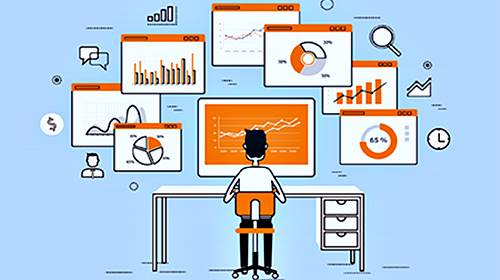

###**📚Importar librerias**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from tqdm import tqdm
from scipy.stats import mode

import warnings
warnings.filterwarnings('ignore')

ModuleNotFoundError: No module named 'imblearn'

###**<span style='font-size:100px;'>&#128064;</span>Visualización inicial de los datos**



In [2]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


###**<span style='font-size:100px;'>&#128195;</span>Tamaño del DF**

In [ ]:
#Tamaño del DataFrame
df.shape

(284807, 31)

<img src="https://es.seaicons.com/wp-content/uploads/2015/06/Comment-icon.png" alt="Texto alternativo" width="80" height="80" >


La base de datos contiene información de 284.807 transacciones (Filas) y 28 variables nombradas desde <font color= #F1C40F>**V1**</font> hasta  <font color=#F1C40F>**V28**</font> y tres variables mas llamadas  <font color=#F1C40F>**"Time"**</font>,  <font color=#F1C40F>**"Amount"**</font> y  <font color=#F1C40F>**"Class"**</font> para un total de 31 columnas.

###**<span style='font-size:100px;'>&#128195;</span>Caracterizacion de los datos**

In [ ]:
#Tipo de datos
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

<img src="https://es.seaicons.com/wp-content/uploads/2015/06/Comment-icon.png" alt="Texto alternativo" width="80" height="80" >

Todas las variales son de tipo númerica y en su mayoria flotantes, con excepcion de "Class" que son enteros.

*   <font color= #F1C40F>**V1**</font>, <font color= #F1C40F>**V2**</font>...,
<font color=#F1C40F>**V28**</font>: Componentes principales obtenidos con PCA. <br>
*<font color=#F1C40F>**"Time"**</font>: Contiene los segundos transcurridos entre cada transacción y la primera transacción en el conjunto de datos.<br>

*   <font color=#F1C40F>**"Amount"**</font>: Monto de la transacción<br>
*   <font color=#F1C40F>**"Class"**</font>: Variable de respuesta la cual toma el valor 1 en caso de fraude y 0 en caso contrario

###**<span style='font-size:100px;'>&#128270;</span>Verificación de datos Nulos**

In [ ]:
#Conteo de nulos
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

<img src="https://es.seaicons.com/wp-content/uploads/2015/06/Comment-icon.png" alt="Texto alternativo" width="80" height="80" >


Se inspecciona si la base de datos contiene datos <font color=#E74C3C>**"Nulos"**</font>, donde se detecta que no existe esta condición en los datos.

**<span style='font-size:100px;'>&#129518;</span>Análisis descriptivo inicial**

In [ ]:
# Descriptiva incial del DF
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


###**<span style='font-size:100px;'>&#128202;</span>Distribución del fraude**

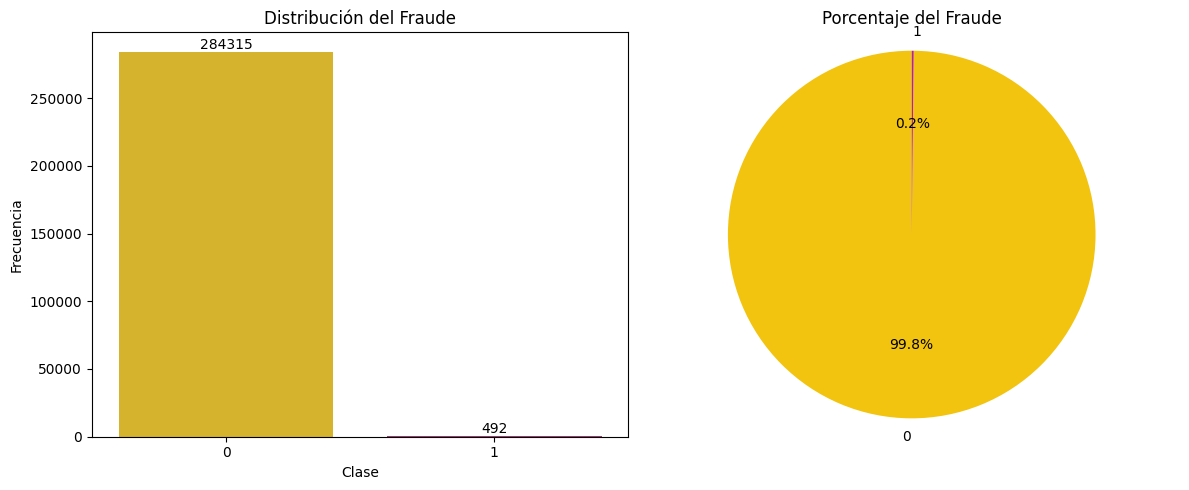

In [ ]:
colors = [(0.95, 0.77, 0.06),(0.73, 0.15, 0.49)]
df_fraude = df[["Class", "Time"]].groupby("Class")[["Time"]].count().reset_index()

# Crear una figura con dos subgráficos
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Graficar el gráfico de barras en el primer subgráfico
sns.barplot(data=df_fraude, x="Class", y="Time", palette=colors, ax=ax1)
ax1.bar_label(ax1.containers[0], fontsize=10)
ax1.set_ylabel("Frecuencia")
ax1.set_xlabel("Clase")
ax1.set_title("Distribución del Fraude")

# Calcular los porcentajes para el diagrama de pastel
porcentajes = df_fraude["Time"] / df_fraude["Time"].sum() * 100

# Dibujar el diagrama de pastel en el segundo subgráfico
ax2.pie(porcentajes, labels=df_fraude["Class"], autopct='%1.1f%%', startangle=90, colors=colors)
ax2.axis('equal')  # Hacer que el pastel sea circular
ax2.set_title("Porcentaje del Fraude")

# Ajustar el diseño para que ambos gráficos sean visibles
plt.tight_layout()

# Mostrar el gráfico
plt.show()

<img src="https://es.seaicons.com/wp-content/uploads/2015/06/Comment-icon.png" alt="Texto alternativo" width="80" height="80" >

La variable denominada <font color=#F1C40F>**"Class"**</font> contiene la información que determina cuando una transacción es fraudulenta, tomando el valor 1 para los <font color=#ba277d>**"Fraudes"**</font> y 0 para los <font color=#F1C40F>**"No Fraudes"**</font>. <br>
La gráfica de distribución del fraude nos muestra que de las 284.807 transacciones 284.315 son <font color=#F1C40F>**"No Fraudes"**</font> correspondientes al <font color=#F1C40F>**99.8%**</font> , en contraste, 492 transacciones son <font color=#ba277d>**"Fraudes" (0.2%)**</font>.<br>
De acuerdo con esta informacón se puede concluir que existe un desbalanceo entre estas dos clases.

#<font color=#FF33F0>**✅ 3. Preparación de los datos**</font>


<img src="https://hablemosdeempresas.com/wp-content/uploads/sites/2/2017/07/big1-1024x630.jpg" alt="Texto alternativo" width="500" height="300" >

###**<span style='font-size:100px;'>&#128202;</span>Análisis Bivariado**

In [4]:
# Se crea un DF donde se guardan los resultados de los analisis bivariado y
# pruebas de hipotesis
df_reduccion = pd.DataFrame(index=df.columns[:-1])

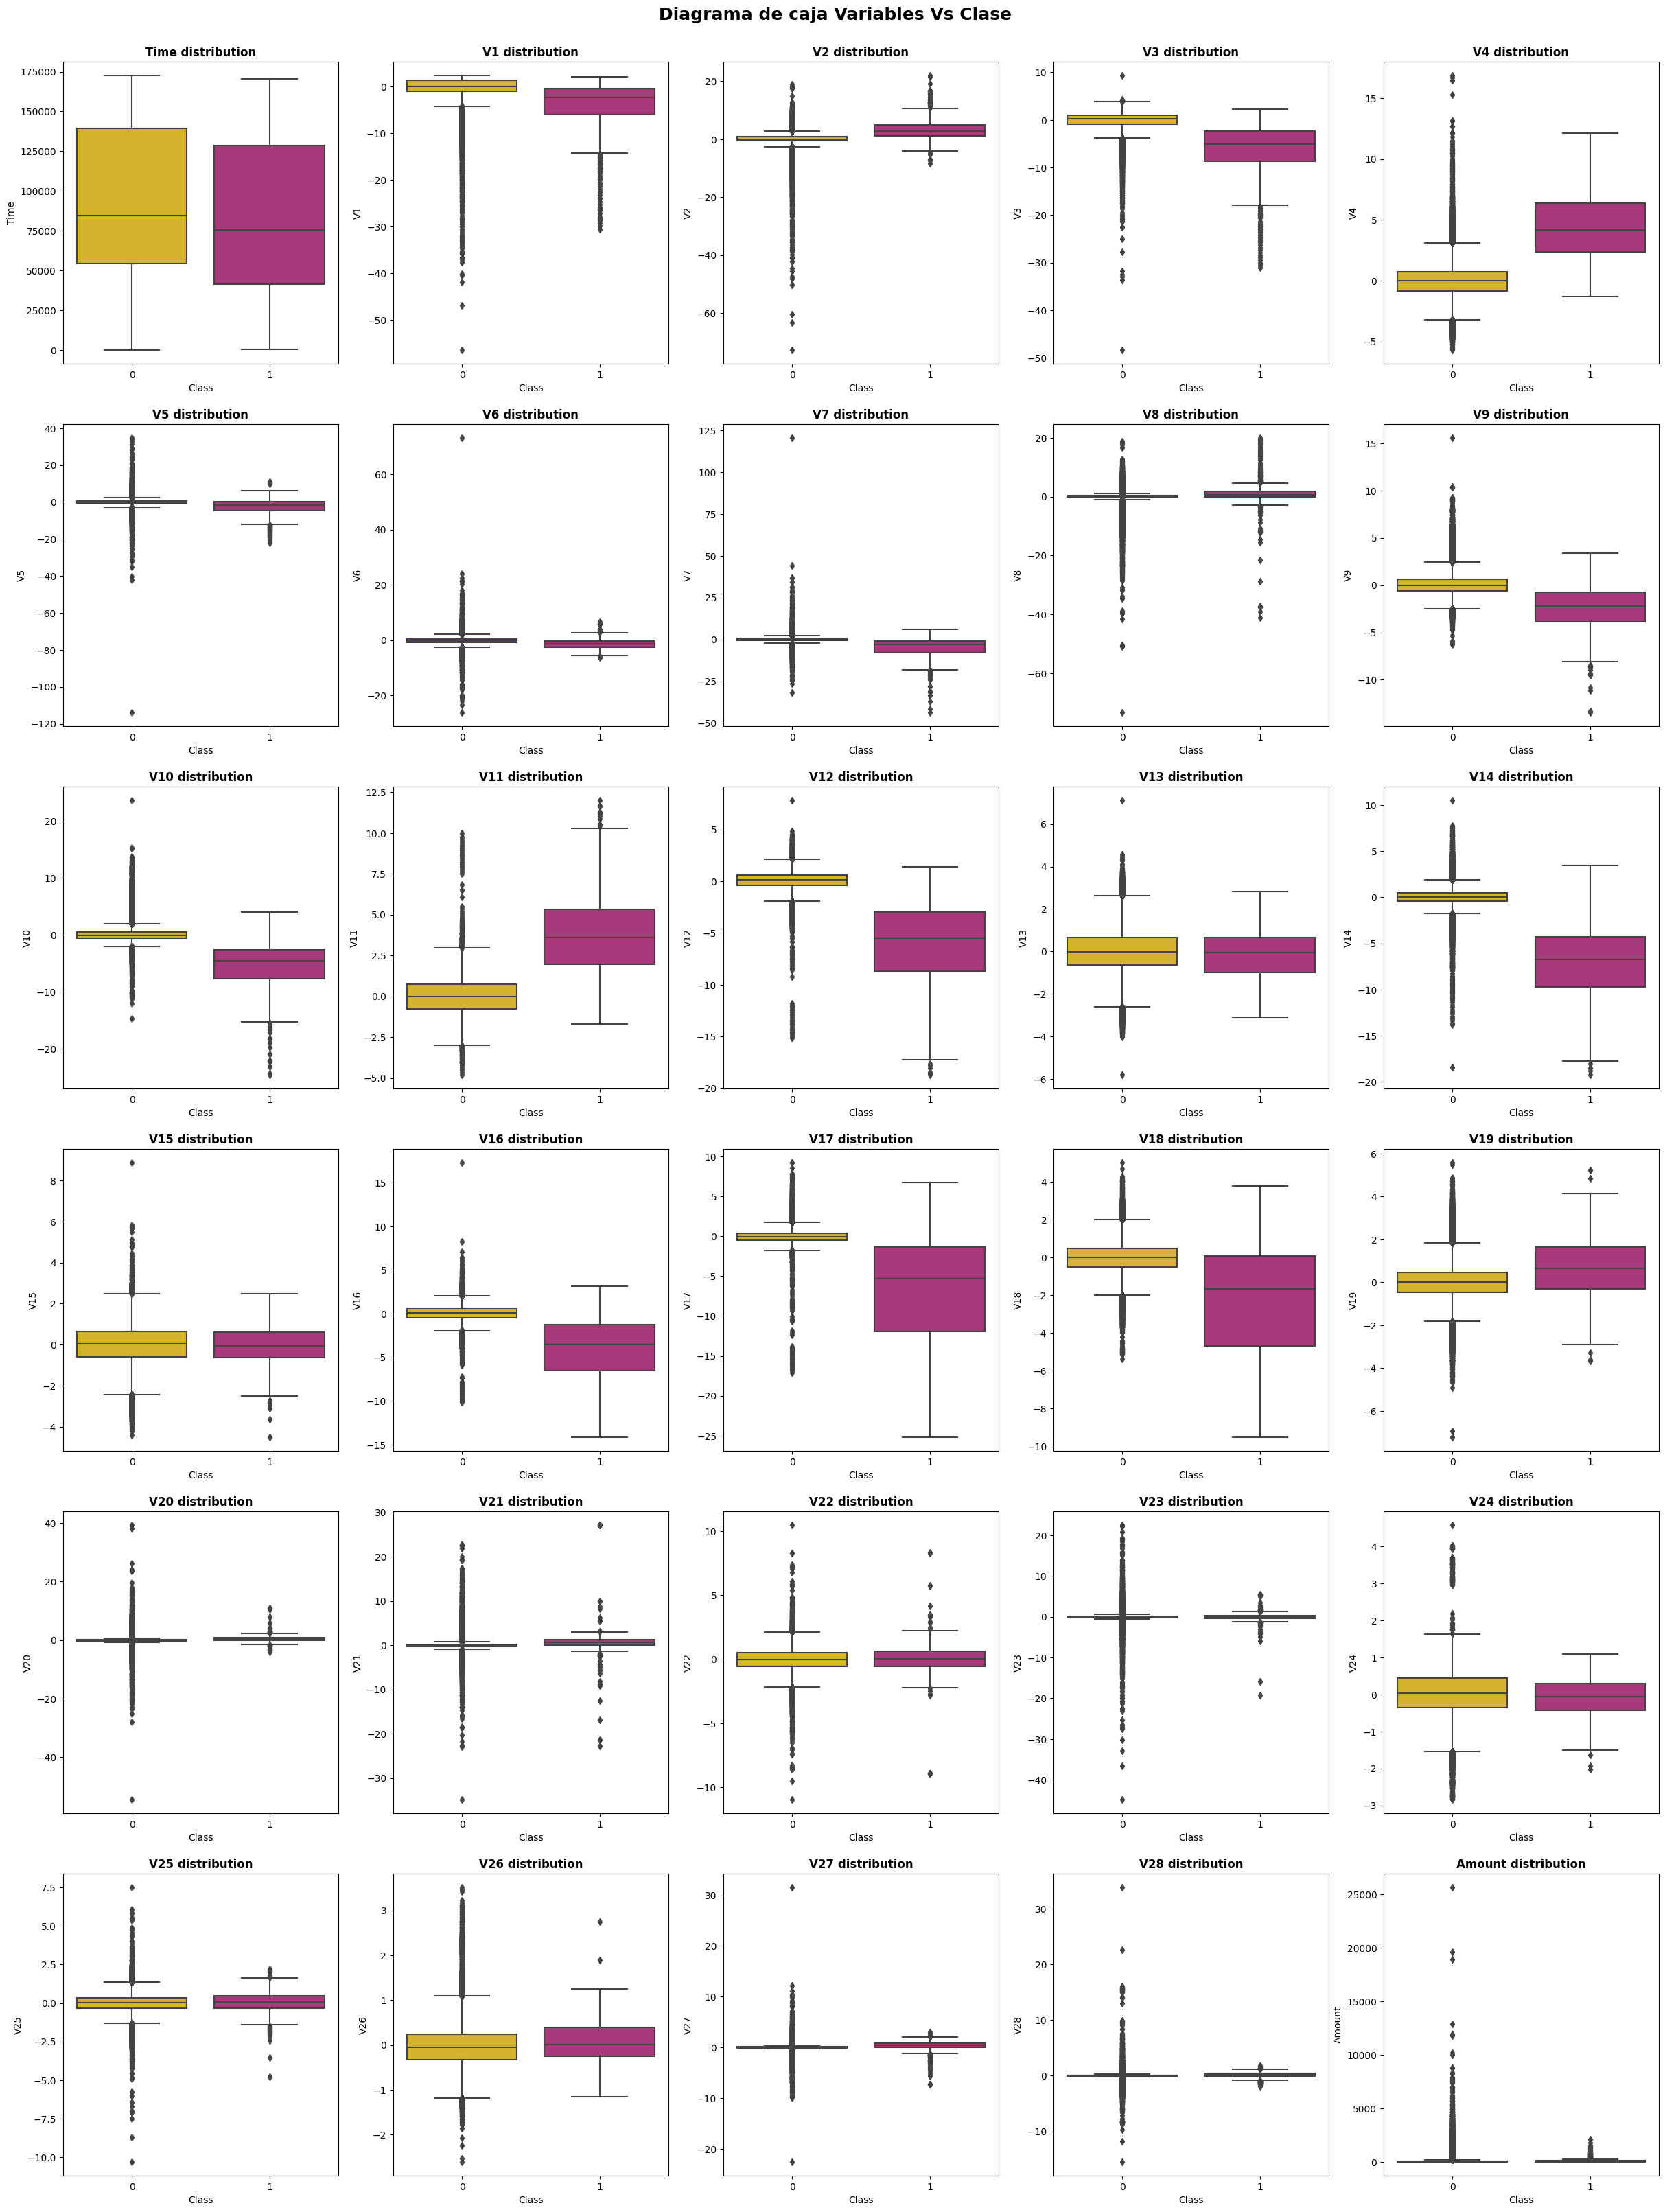

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Diagrama de caja Variables Vs Clase', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i, palette=colors)
  axes[fila,colum].set_title(f"{i} distribution",fontweight='bold')
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1


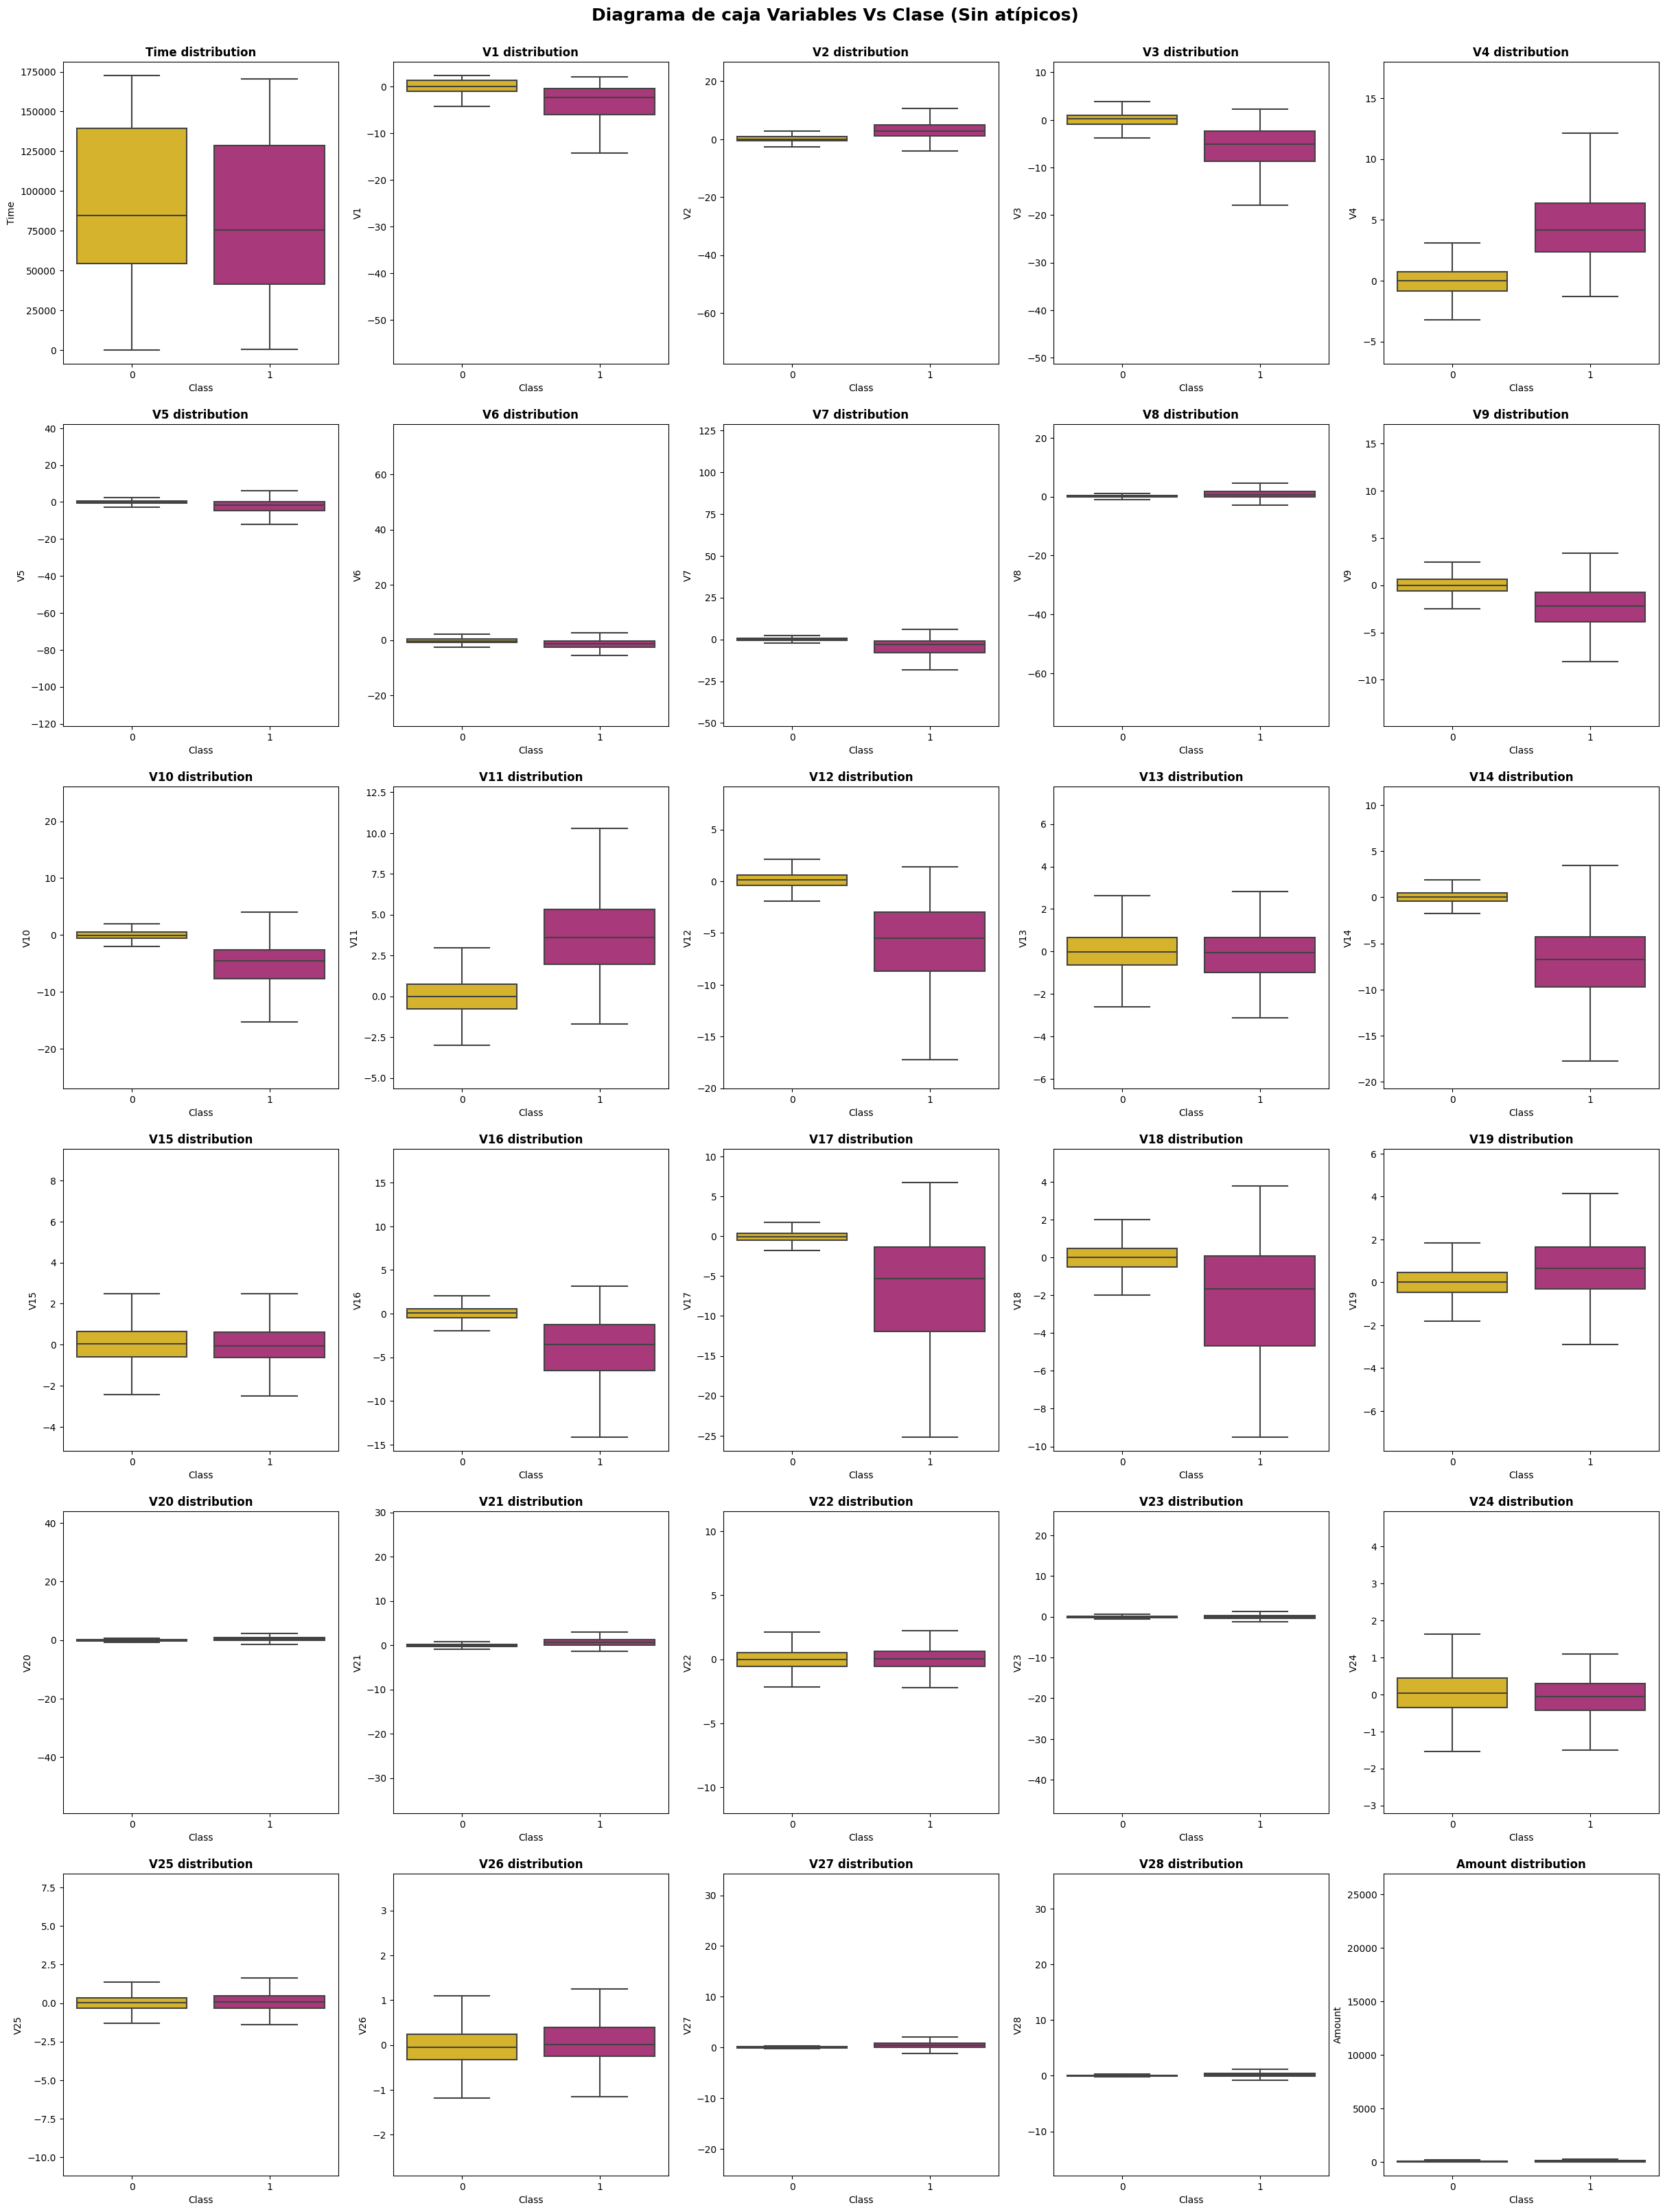

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=5,figsize=(30,40))
fig.suptitle('Diagrama de caja Variables Vs Clase (Sin atípicos)', size = 18, y=0.9, fontweight='bold')
fila=0
colum=0

for i in df.columns[:-1]:
  sns.boxplot(ax=axes[fila,colum], data=df, x='Class', y=i, palette=colors,fliersize=0)
  axes[fila,colum].set_title(f"{i} distribution", fontweight='bold' )
  colum= colum+1
  if colum == 5:
    colum=0
    fila+=1

In [5]:
df_reduccion["Visual"]=[0, 1,1,1,1,1,1,1,1,1,1,1,1,0,1,0,1,1,1,1,0, 1,0, 0, 0, 0, 0, 1,0, 0]

<img src="https://es.seaicons.com/wp-content/uploads/2015/06/Comment-icon.png" alt="Texto alternativo" width="80" height="80" >

De acuerdo a las distribuciones anteriores se concluye lo siguiente:
*   <font color=#F1C40F>**Time**</font>: No se observan diferencias significativas en ambas clases para esta variable. <br>
*   <font color=#F1C40F>**Amount**</font>: No se observan diferencias significativas en ambas clases para esta variable. <br>
*   <font color=#F1C40F>**V13, V15, V20, V22, V23, V24, V25, V26, V28**</font>: No se observan diferencias significativas en ambas clases para estas variables. <br>
Las variables restantes presentan distribuciones distintas para la clase.


##**<span style='font-size:100px;'>&#128204;</span>Selección de variables**

Para las pruebas de hipotesis se consideron un alfa del 0.05, donde si el p-valor es menor a este alpha, la varible se considera significativa para predecir la variable objetivo.

*   True = p-valor<=0.05
*   False = p-valor>0.05

Por consideraciones practicas se tomo la siguiente nomenclatura dependiendo del resultado del p-valor, así:

*   True = 1
*   False = 0

### **Anova**

In [6]:
x = df.drop('Class', axis=1)
y = df['Class']

In [7]:
f_scores = f_classif(x,y)

In [8]:
p_values = f_scores[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduccion["Anova"]=significacia
df_reduccion


,Visual,Anova
Time,0,1
V1,1,1
V2,1,1
V3,1,1
V4,1,1
V5,1,1
V6,1,1
V7,1,1
V8,1,1
V9,1,1


### **Chi-squared**

In [9]:
columnas = df.columns[:-1]

In [10]:
df_escala = df.copy()
df_escala[columnas] = MinMaxScaler().fit_transform(df_escala[columnas])

In [11]:
x = df_escala.drop('Class', axis=1)
y = df_escala['Class']

chi_squared = chi2(x,y)

p_values = chi_squared[1]
alpha = 0.05
significacia = []
for i in range(len(p_values)):
  p = p_values[i]
  if p < alpha:
    significacia.append(1)
  else:
    significacia.append(0)
df_reduccion["Chi2"]=significacia

In [12]:
df_reduccion

,Visual,Anova,Chi2
Time,0,1,1
V1,1,1,0
V2,1,1,0
V3,1,1,1
V4,1,1,1
V5,1,1,0
V6,1,1,0
V7,1,1,0
V8,1,1,0
V9,1,1,1


In [13]:
df_reduccion["Seleccion"]= df_reduccion['Anova']+df_reduccion['Chi2']+df_reduccion['Visual']

In [14]:
df_reduccion

,Visual,Anova,Chi2,Seleccion
Time,0,1,1,2
V1,1,1,0,2
V2,1,1,0,2
V3,1,1,1,3
V4,1,1,1,3
V5,1,1,0,2
V6,1,1,0,2
V7,1,1,0,2
V8,1,1,0,2
V9,1,1,1,3


In [15]:
columns_final = list(df_reduccion[df_reduccion["Seleccion"]>=2].index.values)
columns_final = columns_final + ["Class"]

In [16]:
columns_final

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V14',
 'V16',
 'V17',
 'V18',
 'V19',
 'V21',
 'V27',
 'Class']

In [ ]:
df = df[columns_final]

##**<span style='font-size:100px;'>&#128202;</span>Correlación**

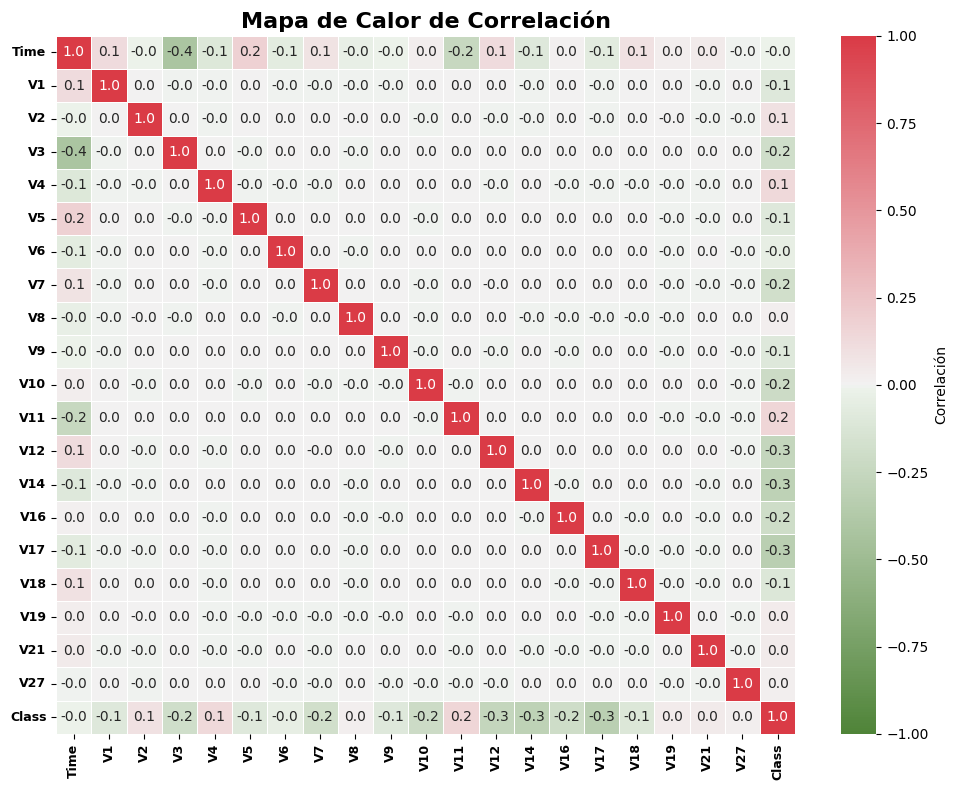

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Crear un mapa de calor con seaborn
plt.figure(figsize=(10, 8))
cmap_custom = sns.diverging_palette(120, 10, as_cmap=True)

# Crear un mapa de calor con seaborn
sns.heatmap(correlation_matrix, annot=True, cmap=cmap_custom, fmt='.1f', linewidths=0.5, vmin=-1, vmax=1,
            cbar_kws={'label': 'Correlación'})

# Añadir un título
plt.title('Mapa de Calor de Correlación', fontsize=16,fontweight='bold')

# Ajustar el tamaño de la fuente de las etiquetas de los ejes
plt.xticks(fontsize=9,fontweight='bold')
plt.yticks(fontsize=9,fontweight='bold')

# Ajustar el espacio entre las etiquetas y el mapa de calor
plt.tight_layout()

# Mostrar el mapa de calor
plt.show()

## **🔬Definición de experimentos**

##**✂️ División de la data**

El dataset sera dividido en dos partes Train y Test, debido al desbalanceo que tiene el dataset, se hace neceario el uso de muestreo estratificado.

*   **Muestreo estratificado**: Cuando se divide un conjunto de datos en entrenamiento y validación, se debe asegurar de mantener la proporción de clases en ambos conjuntos. Esto se conoce como estratificación y ayuda a evitar que una clase esté subrepresentada en alguno de los conjuntos.
Por ejemplo, si tienes dos clases (A y B) y la clase B es minoritaria, asegúrate de que tanto el conjunto de entrenamiento como el de validación tengan la misma proporción de instancias de ambas clases.

* **Sobremuestreo y Submuestreo**: La técnica de sobremuestreo es aumentar el número de instancias de la clase minoritaria y el submuestreo es reducir el número de instancias de la clase mayoritaria.


###**Muestreo estratificado**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df, df["Class"], test_size=0.2, stratify=df["Class"], random_state=42)

In [ ]:
X_test.head(2)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V11,V12,V14,V16,V17,V18,V19,V21,V27,Class
263020,160760.0,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,-0.857785,-0.229961,0.266371,-0.741398,-0.605617,-0.392568,-0.162648,0.080084,0.533837,0
11378,19847.0,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,1.850842,-1.549779,0.963974,-0.147319,-0.209328,1.058898,0.397057,-0.295555,0.110802,0


In [ ]:
X_train.groupby("Class")["Time"].count()/X_train.groupby("Class")["Time"].count().sum()

Class
0    0.998271
1    0.001729
Name: Time, dtype: float64

In [ ]:
X_test.groupby("Class")["Time"].count()/X_test.groupby("Class")["Time"].count().sum()

Class
0    0.99828
1    0.00172
Name: Time, dtype: float64

###**Undersampling**

In [ ]:
N_SAMPLES = 200
RATIO= 0.30
submuestras = []

for i in tqdm(range(N_SAMPLES)):
  random_undersampler = RandomUnderSampler(sampling_strategy=RATIO)
  X_resampled, y_resampled = random_undersampler.fit_resample(X_train, y_train)
  submuestras.append(X_resampled)

100%|██████████| 200/200 [00:20<00:00,  9.60it/s]


#<font color=#3a6cbd>**✅ 4. Modelado**</font>

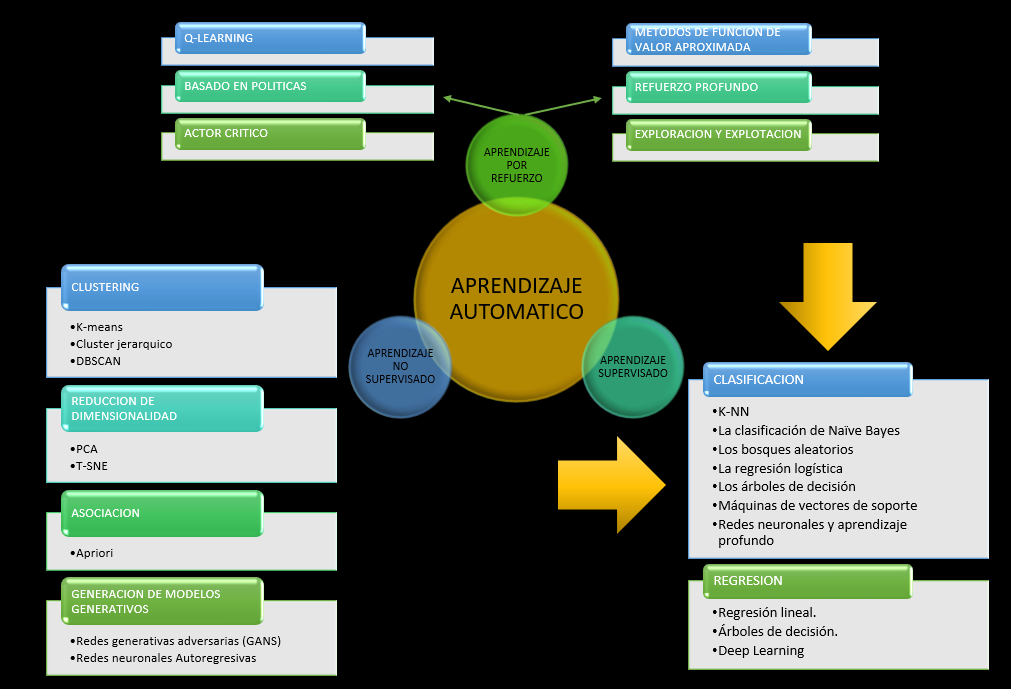


Esta base de datos corresponde a un problema de clasificación, donde se intenta predecir mediante registros de transacciones cuando puede ser un Fraude. <br>

Debido al contexto de esta base de datos, se hará uso de modelos de <font color=#3a6cbd>**clasificación**</font> que hacen parte del <font color=#4fbd6c>**Aprendizaje supervisado**</font> en <font color=#f0f007>**Machine Learning**</font>: <br>


*   K-NN
*   Naive Bayes-Bernoulli
*   Árbol de decisión
*   Bosques aleatorios
*   Regresión logistica
*   Redes Neuronales


Las **Métricas** que se emplearán para medir el resultado de los algoritmos son las siguientes:

*   AUC-ROC: Área bajo la curva de características operativas del receptor

*   AUC-PR: Área bajo la curva de precisión-recuperación

*   F1-SCORE: Es la media harmónica de la precisión (precisión) y el recall (recuperación o sensibilidad).


##**📚Importar librerias para modelamiento**

In [ ]:
#Algorimos de clasificación

from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier

#Métricas
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve, auc, f1_score, confusion_matrix, classification_report

#Optimización

from sklearn.model_selection import GridSearchCV

In [ ]:
resultados = {}
x_cols = columns_final[:-1]
y_cols = columns_final[-1]

## 🤖**Algoritmos**

###**🏘️K-NN**

In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  knn = KNeighborsClassifier()
  knn.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = knn.predict_proba(X_test[x_cols])[:, 1]
  y_pred = knn.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)


resultados["KNN"]=[roc_auc, pr_auc, f1]

100%|██████████| 200/200 [15:41<00:00,  4.71s/it]


###**🎲Naive Bayes-Bernoulli**

In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  model = BernoulliNB()
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)


resultados["NaiveBayes"]=[roc_auc, pr_auc, f1]

100%|██████████| 200/200 [00:42<00:00,  4.69it/s]


###**🌳Árbol de decisión**

In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  model = DecisionTreeClassifier()
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)


resultados["ArbolDecision"]=[roc_auc, pr_auc, f1]

100%|██████████| 200/200 [00:23<00:00,  8.69it/s]


### **🌳🌳Bosques aleatorios**🌳🌳


In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  model = RandomForestClassifier()
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)


resultados["BosqueAleatorio"]=[roc_auc, pr_auc, f1]

100%|██████████| 200/200 [06:32<00:00,  1.96s/it]


###**📈Regresión logistica📉**

In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  model = LogisticRegression()
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)

resultados["RegresionLogistica"]=[roc_auc, pr_auc, f1]


100%|██████████| 200/200 [00:30<00:00,  6.49it/s]


###**🧠Redes neuronales**

In [ ]:
auc_lis = []
pr_lis = []
f1_lis = []

for sub in tqdm(submuestras):
  model = MLPClassifier()
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)

roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)

resultados["RedesNeuronales"]=[roc_auc, pr_auc, f1]

100%|██████████| 200/200 [02:13<00:00,  1.50it/s]


##**Resultado métricas algoritmos**

In [ ]:
df_metricas = pd.DataFrame(resultados, index=['RocAuc', 'PrAuc', 'F1']).T
df_metricas

,RocAuc,PrAuc,F1
KNN,73.9,6.9,1.4
NaiveBayes,95.8,64.9,44.2
ArbolDecision,92.9,46.8,7.2
BosqueAleatorio,97.4,78.6,35.7
RegresionLogistica,96.8,68.9,15.0
RedesNeuronales,78.7,31.9,17.1


##**🏆Optimizacion del mejor modelo**

In [ ]:
# Definir los hiperparámetros a ajustar
param_grid = {
    'n_estimators': [50, 100, 200],           # Número de árboles en el bosque
    'max_depth': [None, 10, 20, 30],          # Profundidad máxima de los árboles
    'min_samples_split': [2, 5, 10],          # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 2, 4]             # Número mínimo de muestras requeridas para estar en un nodo hoja
}

auc_lis = []
pr_lis = []
f1_lis = []
n_estimators_lis = []
max_depth_lis = []
min_samples_split_lis = []
min_samples_leaf_lis = []

for sub in tqdm(submuestras[:20]):
  # Definir el clasificador RandomForest
  rf_classifier = RandomForestClassifier()
  model = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, scoring='average_precision', cv=2)
  model.fit(sub[x_cols], sub[y_cols])

  # Predicción
  y_scores = model.predict_proba(X_test[x_cols])[:, 1]
  y_pred = model.predict(X_test[x_cols])

  # Calcular la curva AUC-ROC
  fpr, tpr, _ = roc_curve(y_test, y_scores)
  roc_auc = auc(fpr, tpr)

  # Calcular la curva AUC-PR
  precision, recall, _ = precision_recall_curve(y_test, y_scores)
  pr_auc = auc(recall, precision)

  # Realizar predicciones y calcular F1 Score
  f1 = f1_score(y_test, y_pred)

  auc_lis.append(roc_auc)
  pr_lis.append(pr_auc)
  f1_lis.append(f1)
  n_estimators_lis.append(model.best_params_["n_estimators"])
  max_depth_lis.append(model.best_params_["max_depth"])
  min_samples_split_lis.append(model.best_params_["min_samples_split"])
  min_samples_leaf_lis.append(model.best_params_["min_samples_leaf"])

In [ ]:
max_depth_lis = [-1 if i is None else i for i in max_depth_lis]
roc_auc = round(np.mean(auc_lis)*100,1)
pr_auc = round(np.mean(pr_lis)*100,1)
f1 = round(np.mean(f1_lis)*100,1)
n_estimators=mode(n_estimators_lis)
max_depth = mode(max_depth_lis)
min_samples_split=mode(min_samples_split_lis)
min_samples_leaf=mode(min_samples_leaf_lis)

### **Selección de hiperparametros y Métricas finales**

In [ ]:
print(f"""El ROC-AUC para este metodo es: {roc_auc} \n
El PR-AUC es: {pr_auc} \n
El F1 es: {f1} \n
A continuacion se mostrará los mejores parámetros: \n
n_estimators: {n_estimators.mode} \n
max_depth: {max_depth.mode} \n
min_samples_split: {min_samples_split.mode}\n
min_samples_leaf: {min_samples_leaf.mode}\n """)

El ROC-AUC para este metodo es: 97.5 



El PR-AUC es: 77.4 

 

El F1 es: 36.3 

 

A continuacion se mostrará los mejores parámetros: 



n_estimators: 100 



max_depth: 30 



min_samples_split: 2



min_samples_leaf: 2

 


In [ ]:
rf_classifier = RandomForestClassifier(
                                      n_estimators=n_estimators.mode,
                                      max_depth=max_depth.mode,
                                      min_samples_split=min_samples_split.mode,
                                      min_samples_leaf=min_samples_leaf.mode
                                        )
train_final = pd.concat(submuestras, axis=0, ignore_index=True)
rf_classifier.fit(train_final[x_cols], train_final[y_cols])

RandomForestClassifier(max_depth=30, min_samples_leaf=2)

#<font color=#29ba61>**✅ 5. EVALUACIÓN**</font>


##**Métricas finales**

In [ ]:
# Predicción
y_scores = rf_classifier.predict_proba(X_test[x_cols])[:, 1]
y_pred   = rf_classifier.predict(X_test[x_cols])

# Calcular la curva AUC-ROC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc     = auc(fpr, tpr)

# Calcular la curva AUC-PR
precision, recall, _ = precision_recall_curve(y_test, y_scores)
pr_auc               = auc(recall, precision)

# Realizar predicciones y calcular F1 Score
f1 = f1_score(y_test, y_pred)
print(f"""Los resultados finales para este modelo son: \n
ROC-AUC: {roc_auc} \n
PR-AUC es: {pr_auc} \n
F1 es: {f1} """)

Los resultados finales para este modelo son: 

 

ROC-AUC: 0.9523261013747085 

 

PR-AUC es: 0.8517384792889441 

 

F1 es: 0.8586387434554974 


##**Resumen de resultados**

###**Reporte de Clasificación**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support



           0       1.00      1.00      1.00     56864

           1       0.88      0.84      0.86        98



    accuracy                           1.00     56962

   macro avg       0.94      0.92      0.93     56962

weighted avg       1.00      1.00      1.00     56962




###**Matriz de confusión**

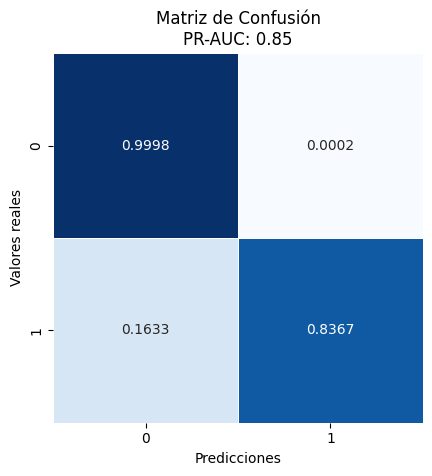

In [ ]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_norm = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]


# Visualizar la matriz de confusión con seaborn
sns.heatmap(conf_matrix_norm, annot=True, fmt='.4f', cmap='Blues', cbar=False, linewidths=.5, square=True)

plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title(f'Matriz de Confusión\nPR-AUC: {pr_auc:.2f}')
plt.show()